## Grid plot
Often you will want to repeat a similar plot on a grid, skyline has some utility classes that allow arbirary plotting functions to be plotted on a grid using custom placement and/or sequential placement of the plot on the grid.

There are several grid plotting classes that either plot to the display or to multipage PDF files, or paginated PNG files. These have a very similar interface, so once you learn one of them they should all be pretty straight forward.

This example illustrates some of the general concepts used to plot to a grid arrangement and we will use the manhattan plot function, however, any function can be used as long as it accepts either a gridspec/tracks keyword argument and a figure keyword argument.

In [1]:
from skyline import (
    grid,
    examples,
    plots,
    coords,
    figure
)
import math

In [2]:
from matplotlib import gridspec

`matplotlib.backends.backend_agg` is required as some of the plotting components need access to a renderer to autosize text and the default figure creation does not seem to set this up, I am not sure why at the moment.

In [3]:
from matplotlib.backends import backend_agg

This is to display the plots within this notebook. Note that `%matplotlib notebook` does not implement any interactive plots. We have to use the display function to plot as we are not using `pyplot`. However, you can also use `matplotlib.figure.Figure.savefig` to save to file.

In [4]:
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline
from IPython.display import display

### Get the example dataset

In [5]:
# Get the example data to plot and some labels for it
paired_gwas_labels = examples.get_data("paired_gwas_labels")
paired_gwas = examples.get_data("paired_gwas")

### A non-grid Manhattan plot
First we will plot a regular non-grid manhattan plot to demonstrate what it should look like. We will then use the same arguments to the grid of Manhattan plots.

In [6]:
# For clarity
data = paired_gwas[0]

In [7]:
# The figure dimentions in inches and the DPI of our plot
figure_width = 4
figure_height = 2
figure_dpi = 150

In [8]:
# The coordinate transformer that will transform chr:pos into genomic coordinates
b37 = coords.HumanGRCh37()

In [9]:
# Initialise the figure
gfig = figure.GenomicFigure(
    figsize=(figure_width, figure_height), dpi=figure_dpi
)
# AttributeError: 'FigureCanvasBase' object has no attribute 'get_renderer'
gfig.set_canvas(backend_agg.FigureCanvas(figure=gfig))

In [10]:
mhp = plots.manhattan(gfig, data, b37)

In [11]:
display(gfig)

### Plot to the grid
As we are running this in a notebook then we will plot to the notebook and not to a file. The grid plots will more commonly be used to plot to files, such as multipage PDFs. Their usage is similar to what is demonstrated below.

We will use `skyline.grid.BaseGrid` to handle the grid plot.

In [12]:
# The gridspec here determines the dimentons of our grid, so 4 rows and 3 columns
spec = gridspec.GridSpec(4, 3)

# The mapper will be used by the manhattan plotting function
b37 = coords.HumanGRCh37()

# Now create the grid object to plot to, it can accept a canvas object which we are
# giving it to avoid the -  AttributeError: 'FigureCanvasBase' object has no attribute 'get_renderer'
dg = grid.BaseGrid(spec, canvas=backend_agg.FigureCanvas)

Now we can plot to the grid object, you will notice that we give the plotting function (not a call to the function) and then all the arguments we would have given to the manhattan plot with the exception of the figure argument which is handled interally. The return value `x` will be explored below.

In [13]:
# Loop through the datasets (should be 12), i is the pandas.DataFrame
for idx, i in enumerate(paired_gwas, 1):
    x = dg.plot(plots.manhattan, i, b37)

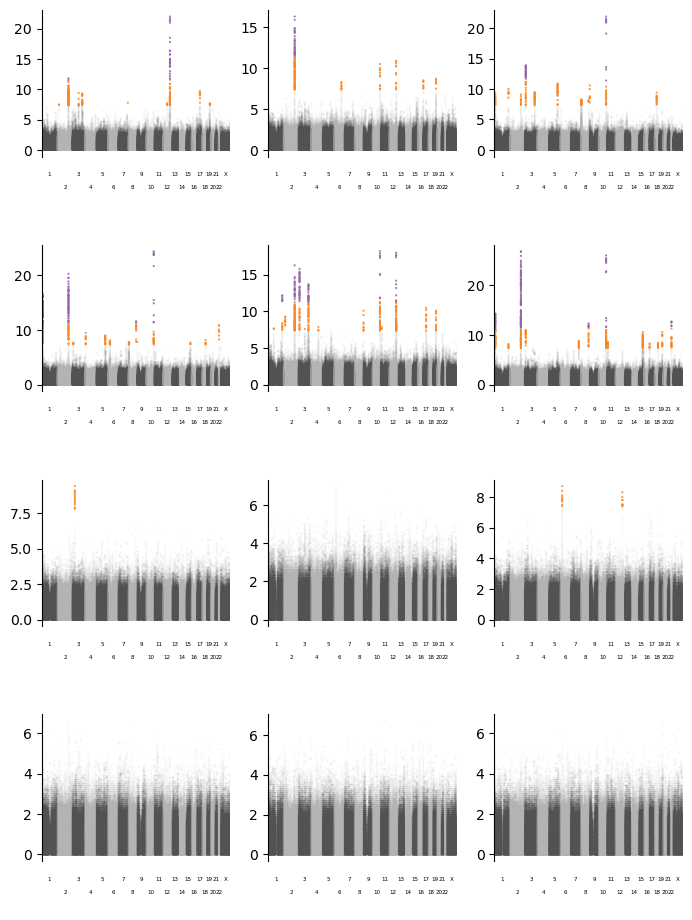

In [14]:
# And display the plots
display(dg.figure)

So we now have a grid of Manhattan plots. However, lets be honest, they don't look great. You might notice some banding on some of the plots with not many significant values. These are due to the downscaled demo data and not the actual plots. Aside from that, the figure dimentions are a bit small and the individual plots all have different y-axis limits, which is not something you generally want on a comparitive grid plot (although it does depend on the application). Additionally, all the plots are showing y-axis values, which you would only need on the left hand plots if they had the same y-axis limits. Similarly the chromosome labels are very small and are not needed on each plot. So let have a look at how we can fix some of this stuff. This involves using the return values from the call to `grid.baseGrid.plot`.

In [15]:
# The figure dimentions in inches and the DPI of our plot
figure_width = 7
figure_height = 5
figure_dpi = 120

In [16]:
# Get a ylim that will be applied to all plots
pad_factor = 1.02
ylim = (0, math.ceil(max([i.pvalue.max() for i in paired_gwas]) * pad_factor))

In [17]:
ylim

(0, 28)

In [19]:
# Now create the grid object to plot to, it can accept a canvas object which we are
# giving it to avoid the -  AttributeError: 'FigureCanvasBase' object has no attribute 'get_renderer'
dg = grid.BaseGrid(spec, figure_kwargs=dict(dpi=figure_dpi, figsize=(figure_width, figure_height)),
                   canvas=backend_agg.FigureCanvas)

In [20]:
# Loop through the datasets (should be 12), i is the pandas.DataFrame
for idx, i in enumerate(paired_gwas, 1):
    x = dg.plot(plots.manhattan, i, b37, ylim=ylim)

In [21]:
# And display the plots
display(dg.figure)

So we now have fixed the y-axis limits, the next steps are to limit the labels. I will update this example soon to illustrate this.